## Due April 25th 2025, 11:59pm

Instructions: Code can be added by +Code tab and text can be added by +Text tab whenever needed.

# Problem 1 [25 Points]

Fit an ellipse to a randomly generated set of 2D data points using optimization
techniques in Python.

Given a random dataset in 2D space that roughly follows an elliptical shape,
your goal is to determine the parameters $(a,b,r_x,r_y)$, where:

* $(a,b)$ represents the center of the ellipse.

* $r_x$ and $r_y$ represent the radii along the $x$- and $y$-axes, respectively.


The ellipse equation we aim to fit is:
$$ \frac{(x-a)^2}{r_x^2} +\frac{(y-b)^2}{r_y^2} = 1$$

Insturctions:

(a). Generate data points:

* Create a random dataset with $M$ points that approximately lie on
an ellipse centered at $(a,b)$ with given radii $r_x$ and $r_y$.

* Add random noise to simulate real-world data imperfections.

[*Hint: Use random angles and trigonometric functions to generate
points on an ellipse.*]

(b). Fit an Ellipse:

* Write a Python function `ellipseFitByDss(data)` that takes a $2$-by-
$M$ array of data points and returns the best-fit ellipse parameters
$(a,b,r_x,r_y)$ by minimizing the distance of each point to the ellipse.

[*Hint: Use scipy.optimize.minimize with the "Nelder-Mead” method
to find the optimal parameters.*]

(c). Visualize the Results:

* Plot the original data points.
* Plot the fitted ellipse using the parameters from `ellipseFitByDss`.

[*Hint: Use the `matplotlib.pyplot` library for plotting.*]

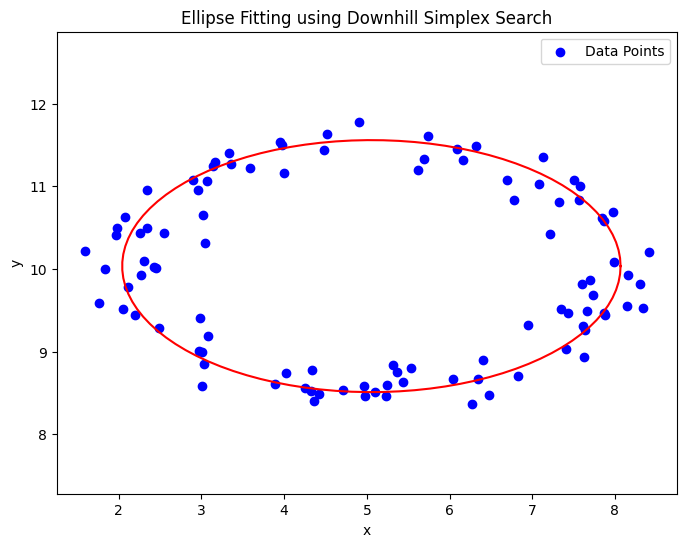

Fitted Ellipse Parameters:
Center: (5.05, 10.04)
Radii: (r_x = 3.01, r_y = 1.52)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def generate_ellipse_data(a, b, r_x, r_y, M, noise_level=0.1):
# Hint: Generate random angles and use cos/sin for ellipse points.
  # 1. generate random angles
  theta = np.random.uniform(0, 2 * np.pi, M)
  # 2. generate ideal ellipse points
  x = a + r_x * np.cos(theta)
  y = b + r_y * np.sin(theta)
  # 3. add random gaussian noise
  x_noisy = x + np.random.normal(0, noise_level * r_x, M)
  y_noisy = y + np.random.normal(0, noise_level * r_y, M)
  return np.array([x_noisy, y_noisy])

# Objective function: Sum of squared errors to the ellipse equation
def ellipse_objective(params, data):
    a, b, rx, ry = params  # Unpack ellipse parameters
    x, y = data  # Extract x and y coordinates

    # Compute error based on the implicit ellipse equation
    error = ((x - a) / rx) ** 2 + ((y - b) / ry) ** 2 - 1
    return np.sum(error ** 2)  # Sum of squared errors

def ellipseFitByDss(data):
# Hint: Define an objective function and use minimize with ’Nelder-Mead’.
  # Initial guesses (mean of data points + rough estimate for rx, ry)
  x, y = data
  initial_guess = [np.mean(x), np.mean(y), (np.max(x) - np.min(x)) / 2, (np.max(y) - np.min(y)) / 2]

  # Minimize the objective function using Nelder-Mead
  result = minimize(ellipse_objective, initial_guess, args=(data,), method="Nelder-Mead")

  # Extract optimized parameters
  a_opt, b_opt, rx_opt, ry_opt = result.x
  return a_opt, b_opt, rx_opt, ry_opt

def plot_ellipse(a, b, r_x, r_y, color='r'):
  # Hint: Use np.linspace and trigonometric functions for plotting.
  # 1. generate random angles
  theta = np.linspace(0, 2 * np.pi, 100)
  # 2. generate ideal ellipse points
  x = a + r_x * np.cos(theta)
  y = b + r_y * np.sin(theta)
  plt.plot(x, y, color=color)
  return

# Main script
# Generate random data points around an ellipse
true_a, true_b = 5, 10 # True center
true_r_x, true_r_y = 3, 1.5 # True radii
M = 100 # Number of points
# Generate the data
data = generate_ellipse_data(true_a, true_b, true_r_x, true_r_y, M)
# Fit the ellipse
fitted_params = ellipseFitByDss(data)
# Extract fitted parameters and plot results
fitted_a, fitted_b, fitted_r_x, fitted_r_y = fitted_params
# Plot the original data points and the fitted ellipse
plt.figure(figsize=(8, 6))
plt.scatter(data[0, :], data[1, :], label="Data Points", color="blue")
plot_ellipse(fitted_a, fitted_b, fitted_r_x, fitted_r_y, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Ellipse Fitting using Downhill Simplex Search")
plt.axis('equal')
plt.show()

# Display fitted parameters
print("Fitted Ellipse Parameters:")
print(f"Center: ({fitted_a:.2f}, {fitted_b:.2f})")
print(f"Radii: (r_x = {fitted_r_x:.2f}, r_y = {fitted_r_y:.2f})")

# Problem 2 [25 Points]
In certain chemical reactions, the concentrations of substances at equilibrium can be modeled using a system of nonlinear equations. Suppose a reaction involving three substances A, B, and C must satisfy the following equilibrium equations:

\begin{aligned}
x^2 + y^2 + z^2 &= 1 \quad \text{(conservation of mass)} \\
x + y - z &= 0.2 \quad \text{(reaction constraint)} \\
x \cdot y &= 0.04 \quad \text{(interaction term)}
\end{aligned}

Here, $x$, $y$, $z$ represent normalized concentrations of substances A, B, and C respectively.

	1.	Write a Python function that defines this system of equations.
	2.	Use scipy.optimize.root to solve for x, y, z.
	3.	Use an initial guess of [0.1, 0.1, 0.1].
	4.	Print the solution and verify that the residual of each equation is close to 0.


In [2]:
import numpy as np
from scipy.optimize import root

# Step 1: Define the system of equations
def equations(vars):
    x, y, z = vars
    eq1 = x**2 + y**2 + z**2 - 1
    eq2 = x + y - z - 0.2
    eq3 = x * y - 0.04
    return [eq1, eq2, eq3]

# Step 2: Call scipy.optimize.root
initial_guess = [0.1, 0.1, 0.1]
solution = root(equations, initial_guess)

# Step 3: Print result
print("Success:", solution.success)
print("Solution [x, y, z]:", solution.x)

# Step 4: Check residuals
residuals = equations(solution.x)
print("Residuals:", residuals)

Success: True
Solution [x, y, z]: [0.05151336 0.77649763 0.62801099]
Residuals: [np.float64(0.0), np.float64(-5.551115123125783e-17), np.float64(0.0)]


# Problem 3 [25 Points]
After a severe storm hits a coastal region, your team at an international humanitarian logistics organization is tasked with delivering emergency aid to affected communities. You are managing a fleet of autonomous supply boats that can carry two types of emergency kits:

	•	Kit A: Food and water for a family of 4 for 3 days
	•	Kit B: Medical supplies for a small community

Due to cargo constraints, you must choose how many of each kit to send on each boat to maximize impact under limited weight and space capacity.

| Product | Weight (kg) | Volume (m³) | Impact Score |
|---------|-------------|-------------|--------------|
| A       | 30          | 2           | 50           |
| B       | 20          | 4           | 40           |

Each supply boat can carry:

	•	at most 240 kg
	•	at most 24 m³

Your goal is to maximize the total impact score delivered by one supply boat. Let:

	•	x_1: number of Kit A
	•	x_2: number of Kit B
  
  Use linear programming to determine how many of each emergency kit type to load onto a single boat to maximize the total impact, without exceeding the boat’s weight and volume limits.






Maximize:
$50x_1 + 40x_2$

Subject to:
\begin{aligned}
30x_1 + 20x_2 &\leq 240 \quad \text{(weight constraint)} \\
2x_1 + 4x_2 &\leq 24 \quad \text{(volume constraint)} \\
x_1, x_2 &\geq 0 \quad \text{(non-negativity)}
\end{aligned}

In [3]:
from scipy.optimize import linprog

# Coefficients of the objective function (negative for maximization)
c = [-50, -40]

# Constraint matrix A_ub and vector b_ub
A = [
    [30, 20],  # weight constraint
    [2, 4]     # volume constraint
]
b = [240, 24]

# Bounds (non-negative values)
bounds = [(0, None), (0, None)]

# Solve using linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Print results
if res.success:
    print("Optimal solution found:")
    print(f"Kit A units: {res.x[0]:.2f}")
    print(f"Kit B units: {res.x[1]:.2f}")
    print(f"Total impact score: {-res.fun:.2f}")
else:
    print("Optimization failed.")

Optimal solution found:
Kit A units: 6.00
Kit B units: 3.00
Total impact score: 420.00


# Problem 4 [25 Points]
In class, we studied the basic SIR model of infectious disease spread:

\begin{aligned}
\frac{dS}{dt} &= -\beta \cdot \frac{S \cdot I}{N} \\
\frac{dI}{dt} &= \beta \cdot \frac{S \cdot I}{N} - \gamma I \\
\frac{dR}{dt} &= \gamma I
\end{aligned}

You used `scipy.integrate.odeint` to simulate the model under a fixed contact rate $\beta$. You are now asked to simulate the effect of a 30-day lockdown on the spread of a COVID-like disease.

	1.	Modify the SIR model in class provided below.
	2.	Simulate the system for 160 days, assuming:
	•	Population N = 1{,}000{,}000
	•	Initial conditions: I_0 = 10, R_0 = 0, S_0 = N - I_0 - R_0
	•	Recovery rate \gamma = 1/14 (average infectious period = 14 days)
	•	Transmission rate \beta changes as follows:
	•	Before lockdown (day 0–30): \beta = 0.3
	•	During lockdown (day 30–60): \beta = 0.1
	•	After lockdown (day 60–160): \beta = 0.25
	3.	Plot the number of Susceptible, Infected, and Recovered individuals over time.
	4.	Clearly label the lockdown period on the plot (e.g., shaded region). [Hint: plt.axvspan(t_start, t_end, color='gray', alpha=0.2, label='Lockdown')]
	5.	Report the peak number of infections and when it occurs.
	6.	Briefly explain: How did the lockdown affect the disease peak compared to a scenario with no lockdown?

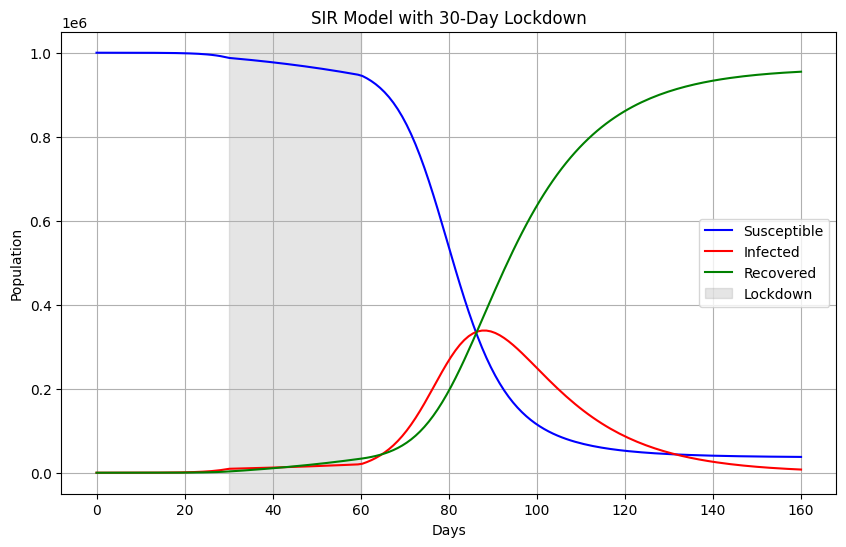

Peak infections: 338,438 people on day 87.5


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Total population
N = 1_000_000

# Initial conditions
I0 = 10
R0 = 0
S0 = N - I0 - R0
y0 = [S0, I0, R0]

# Time grid (in days)
t = np.linspace(0, 160, 160)

# Recovery rate
gamma = 1/14

# Time-dependent beta function
def beta(t):
    if t < 30:
        return 0.3     # Before lockdown
    elif t < 60:
        return 0.1     # During lockdown
    else:
        return 0.25    # After lockdown

# SIR model with time-dependent beta
def deriv(y, t):
    S, I, R = y
    b = beta(t)
    dSdt = -b * S * I / N
    dIdt = b * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Solve the system
sol = odeint(deriv, y0, t)
S, I, R = sol.T

# Find peak infection
peak_I = np.max(I)
peak_day = t[np.argmax(I)]

# Plot
plt.figure(figsize=(10,6))
plt.plot(t, S, 'b', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered')

# Highlight lockdown period
plt.axvspan(30, 60, color='gray', alpha=0.2, label='Lockdown')

plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SIR Model with 30-Day Lockdown')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Peak infections: {peak_I:,.0f} people on day {peak_day:.1f}")

	•	Lockdown (day 30–60) flattens the infection curve.
	•	The peak number of infected individuals is delayed and lower than in a constant β = 0.3 case.
	•	A visible dip in the infection rate growth during the shaded lockdown period.